In [2]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [3]:
data=pd.read_csv('salaries.csv')
data

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [4]:
lb=LabelEncoder()


In [5]:
data['Acompany']=lb.fit_transform(data['company'])

In [6]:
data['Ajob']=lb.fit_transform(data['job'])

In [7]:
data['Adegree']=lb.fit_transform(data['degree'])

In [8]:
data


,company,job,degree,salary_more_then_100k,Acompany,Ajob,Adegree
0,google,sales executive,bachelors,0,2,2,0
1,google,sales executive,masters,0,2,2,1
2,google,business manager,bachelors,1,2,0,0
3,google,business manager,masters,1,2,0,1
4,google,computer programmer,bachelors,0,2,1,0
5,google,computer programmer,masters,1,2,1,1
6,abc pharma,sales executive,masters,0,0,2,1
7,abc pharma,computer programmer,bachelors,0,0,1,0
8,abc pharma,business manager,bachelors,0,0,0,0
9,abc pharma,business manager,masters,1,0,0,1


In [9]:
data.drop(['company','job','degree'],axis=1,inplace=True)	

In [10]:
x=data.drop(['salary_more_then_100k'],axis=1)
x

,Acompany,Ajob,Adegree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [11]:
y=data['salary_more_then_100k']
y

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [12]:
model=DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [13]:
model.fit(x,y)

DecisionTreeClassifier()

In [14]:
model.score(x,y)

1.0

In [15]:
y_predict=model.predict(x)

In [16]:
accuracy_score(y,y_predict)

1.0

In [17]:
cm=confusion_matrix(y,y_predict)
cm

array([[ 6,  0],
       [ 0, 10]], dtype=int64)

In [18]:
classification_report(y,y_predict)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         6\n           1       1.00      1.00      1.00        10\n\n    accuracy                           1.00        16\n   macro avg       1.00      1.00      1.00        16\nweighted avg       1.00      1.00      1.00        16\n'

In [19]:
type(y)

pandas.core.series.Series

In [20]:
type(y_predict)

numpy.ndarray

In [21]:
df=pd.DataFrame({'actual y':y,'predicted_y':y_predict})
df

,actual y,predicted_y
0,0,0
1,0,0
2,1,1
3,1,1
4,0,0
5,1,1
6,0,0
7,0,0
8,0,0
9,1,1


In [22]:
import seaborn as sns

<Axes: >

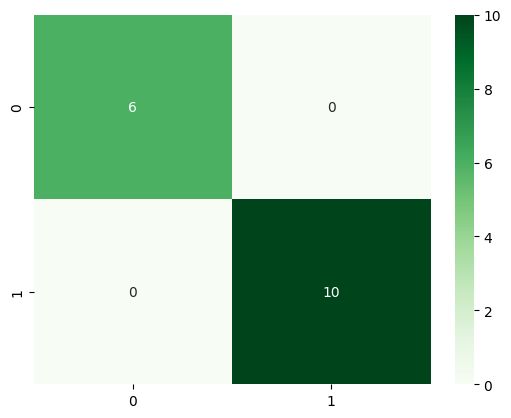

In [23]:
sns.heatmap(cm,annot=True,cmap='Greens')

In [24]:
print(tree.export_text(model))

|--- feature_0 <= 0.50
|   |--- feature_2 <= 0.50
|   |   |--- class: 0
|   |--- feature_2 >  0.50
|   |   |--- feature_1 <= 1.00
|   |   |   |--- class: 1
|   |   |--- feature_1 >  1.00
|   |   |   |--- class: 0
|--- feature_0 >  0.50
|   |--- feature_0 <= 1.50
|   |   |--- class: 1
|   |--- feature_0 >  1.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_1 >  0.50
|   |   |   |--- feature_2 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  0.50
|   |   |   |   |--- feature_1 <= 1.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  1.50
|   |   |   |   |   |--- class: 0

